
The Random Forest model is an ensemble learning method used for both regression and classification tasks. It builds multiple decision trees and merges their predictions to improve accuracy and control overfitting.



Random Forest RMSE: 0.0519707688579254


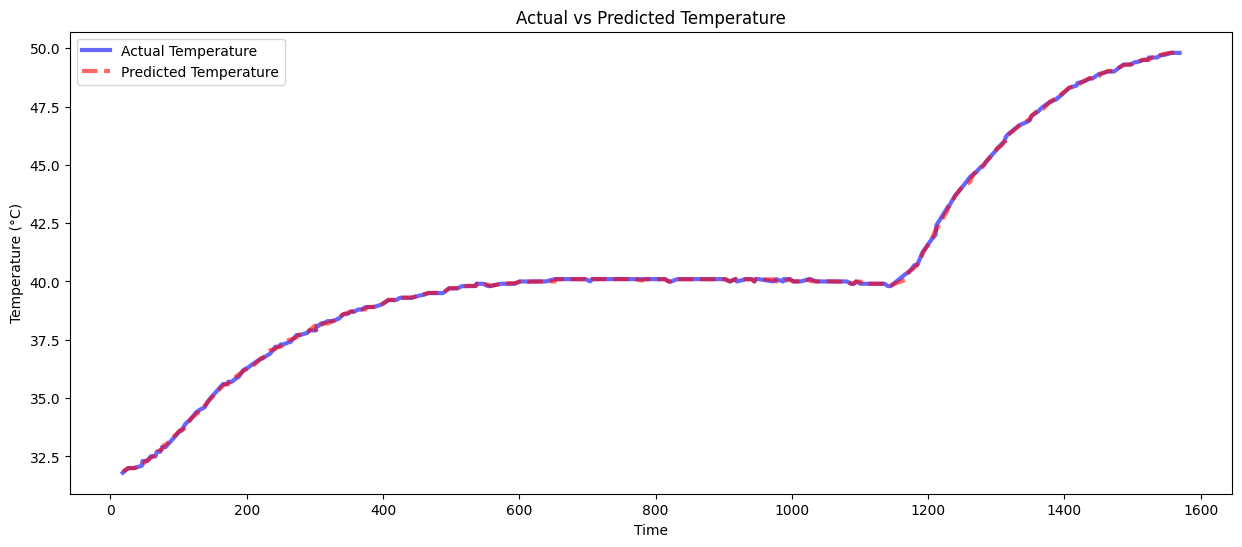

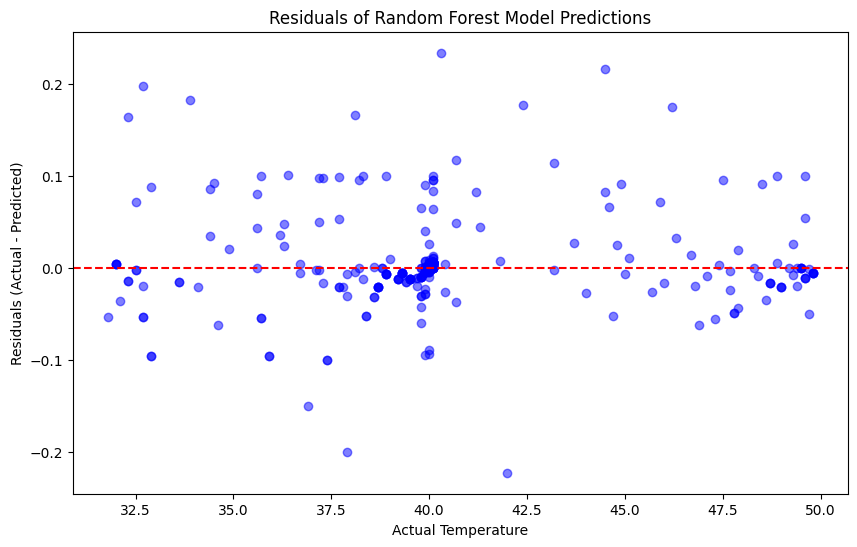

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = '/time vs temperature.xlsx'  # Update this to your file path
df = pd.read_excel(file_path)

# Ensure the 'time' column is in datetime format
df['time'] = pd.to_datetime(df['time'])

# Feature Engineering
# Creating lag features for the past 3 measurements of temperature
for lag in range(1, 4):
    df[f'temperature_lag_{lag}'] = df['temperature'].shift(lag)

# Creating features based on the 'time' column
df['day_of_week'] = df['time'].dt.dayofweek  # Day of the week as an integer (0=Monday)
df['hour'] = df['time'].dt.hour  # Hour of the day

# Drop rows with NaN values created by lag features
df_cleaned = df.dropna()

# Preparing the dataset for Random Forest
X = df_cleaned.drop(['time', 'temperature'], axis=1)
y = df_cleaned['temperature']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest RMSE: {rmse_rf}")


# Preparing data for plotting actual vs predicted temperatures
y_test_pred_df = pd.DataFrame({'Actual Temperature': y_test, 'Predicted Temperature': y_pred_rf}).sort_index()

# Adjusting the plot with thicker lines for better visibility

plt.figure(figsize=(15, 6))
plt.plot(y_test_pred_df['Actual Temperature'], label='Actual Temperature', color='blue', alpha=0.6, linewidth=3)  # Increased line width
plt.plot(y_test_pred_df['Predicted Temperature'], label='Predicted Temperature', color='red', linestyle='--', alpha=0.6, linewidth=3)  # Increased line width
plt.title('Actual vs Predicted Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred_rf

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals of Random Forest Model Predictions')
plt.xlabel('Actual Temperature')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

